In [2]:
from commonfunctions import *
import skimage
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [63]:
def paper_binary_transfer(gray_image): # gray-scale from 0-1
    return_image = np.copy(gray_image)
    thresh = threshold_otsu(return_image)
    for i in range(0,gray_image.shape[0]):
        for j in range(0,gray_image.shape[1]):
            if gray_image[i][j] > thresh :
                return_image[i][j] =0
            else :
                return_image[i][j] =1
                
    return return_image

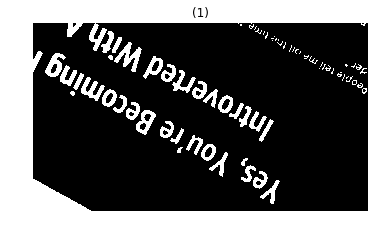

In [64]:
import cv2
my_final_img = io.imread('rotation_cases/case_diagonal2.jpeg', -1)
my_final_img = paper_binary_transfer(rgb2gray(my_final_img))
show_images([my_final_img])


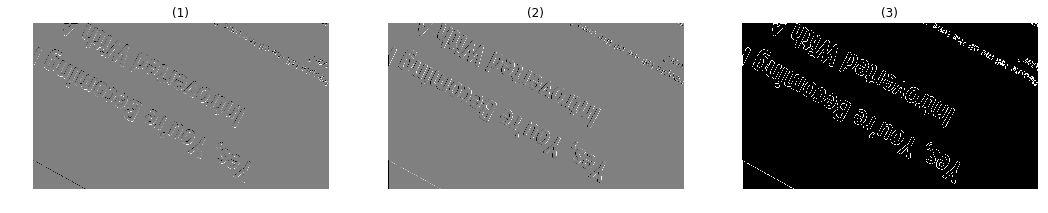

In [55]:
def sobel_imp(image,threshold):
    output_x = np.copy(image)
    output_y = np.copy(image)
    output = np.copy(image)
    
    f1 = np.array([
        [ -1,0,1],
        [ -2,0,2],
        [ -1,0,1]
    ])
    f2 = np.array([
        [ -1,-2,-1],
        [ 0,0,0],
        [ 1,2,1]
    ])
    
    output_x = convolve2d(image,f2)
    output_y = convolve2d(image,f1)
    
    
    for x in range(0,image.shape[0]):
        for y in range(0,image.shape[1]):
            output[x][y] = np.sqrt(((output_x[x][y]**2)+(output_y[x][y]**2)))
            if output[x][y] > threshold:
                output[x][y] = 255
            else :
                output[x][y] = 0
                
    show_images([output_x,output_y,output])
    return output
good_sobel = sobel_imp(my_final_img,0.6)

In [56]:
def most_frequent(List): 
    counter = 0
    num = List[0] 
      
    for i in List: 
        curr_frequency = List.count(i) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i 
  
    return num 

(890, 1586)
-61.420612813370475
-61.420612813370475
-60.91922005571031
-61.420612813370475
-61.420612813370475
-63.42618384401114
-61.420612813370475
-61.420612813370475
-61.92200557103064
-60.91922005571031
-61.420612813370475
-61.420612813370475
-59.91643454038998
-61.420612813370475
-58.91364902506964
-61.420612813370475
-65.43175487465182


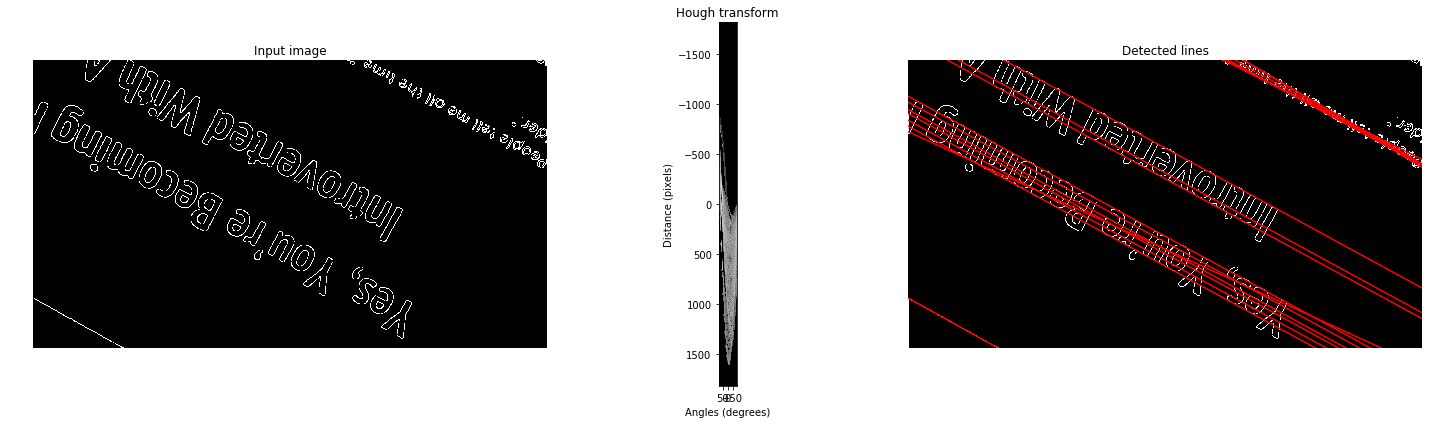

In [57]:
import numpy as np

from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm

def hough1(temp_image):
    image = temp_image
    # Classic straight-line Hough transform
    # Set a precision of 0.5 degree.
    tested_angles = np.linspace(-np.pi/2 , np.pi/2, 360)
    h, theta, d = hough_line(image, theta=tested_angles)
    
    # Generating figure 1
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    ax = axes.ravel()

    ax[0].imshow(image, cmap=cm.gray)
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(np.log(1 + h),
                 extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
                 cmap=cm.gray, aspect=1/1.5)
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')

    ax[2].imshow(image, cmap=cm.gray)
    origin = np.array((0, image.shape[1]))
    _, angle, dist = hough_line_peaks(h, theta, d)
    list_of_angles = []
    #print(list_of_angles)
    
    for i in range(0,len(angle)):
        list_of_angles.append(float("{0:.0f}".format(np.rad2deg(angle[i]))))
    final_angle = most_frequent(list_of_angles)
    
    for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
        #if float("{0:.1f}".format(angle)) == final_angle:
        #    print(final_angle)
        print(np.rad2deg(angle))
        y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
            #print(origin)
            #print(y0,y1)
        ax[2].plot(origin, (y0, y1), '-r')
            #print("slope", (y1-origin[1]) / (y0-origin[0]))
    ax[2].set_xlim(origin)
    ax[2].set_ylim((image.shape[0], 0))
    ax[2].set_axis_off()
    ax[2].set_title('Detected lines')


    plt.tight_layout()
    plt.show()
    return final_angle
print(good_sobel.shape)
angle_of_rotation1 = hough1(good_sobel)

-151.0


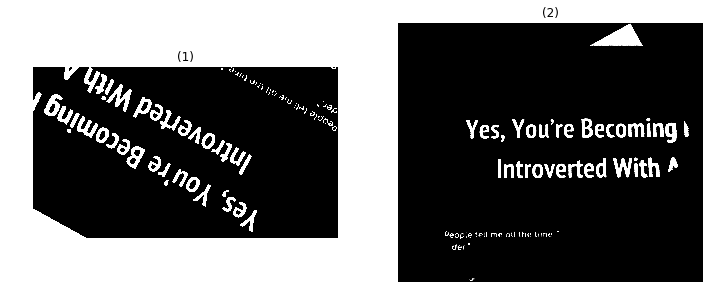

In [58]:
import math
from skimage.transform import rotate

rotation_angle = -(90- angle_of_rotation1)    
print(rotation_angle)
    
rotated_image = rotate(my_final_img, rotation_angle, resize=True)
show_images([my_final_img,rotated_image])